# In this program we intend to find out what kind of feature/attribute create homophily in a network, figure out on what basic (tweets, hashtags, interest) do user connect with each other.

In [1]:
import networkx as nx 
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating a directed graph of the network
G = nx.DiGraph()
edge_file = open('data/edges.edges', mode='r')
for rows in edge_file:
    edges = rows.strip().split()
    G.add_edge(int(edges[0]),int(edges[1]))
edge_file.close()

In [3]:
# Feature Extraction
# Feature data details:
# There are two files related to features, one file contains all the features collected from every user extracted from their profile ( with help hashtags, tweets and tags)
# Another file contains a features related with every user. Features are '1' if the user has this property in their profile, and '0' otherwise.

feat_list = []
feat_list_file = open('data/feat.featnames', mode='r', encoding="utf-8")
for rows in feat_list_file:
    data = rows.strip().split()
    feat_list.append(data[1])
    

user_feat_map = {}
user_feat_file = open('data/userFeat.feat', mode='r', encoding="utf-8")
for rows in user_feat_file:
    data = (rows.strip().split())
    user_feat_map[data[0]] = data[1:]

feat_users_map = {}
for idx, feat in enumerate(feat_list):
    temp_user_list = []
    for userId in user_feat_map:
        if(user_feat_map[userId][idx] == '1'):
            temp_user_list.append(userId)
    if (len(temp_user_list) > 1):
        feat_users_map[feat] = temp_user_list

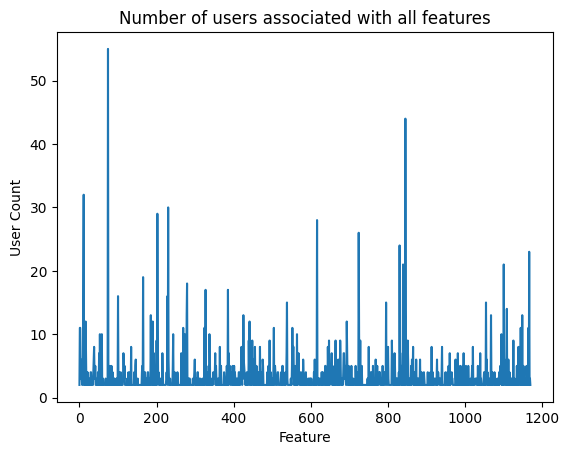

In [4]:
# Create graph of features and its related users.
featureNum = []
userCount = []
for idx, item in enumerate(feat_users_map):
    featureNum.append(idx)
    userCount.append(len(feat_users_map[item]))
    
plt.plot(featureNum, userCount)
plt.title("Number of users associated with all features")
plt.xlabel("Feature")
plt.ylabel("User Count")
plt.show()

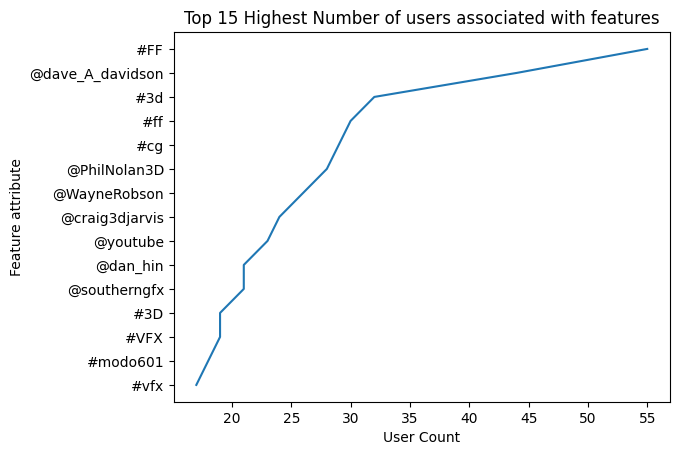

In [5]:
# Get top 15 feature with highest number of common users.
feat_user_temp_map = feat_users_map.copy()
highUserFeatureMap = {}

def returnFeatureWithHighestUser(feat_map):
    featWithHighUser = ''
    userCount = 0
    for userId in feat_map:
        if(len(feat_map[userId]) > userCount):
            featWithHighUser = userId
            userCount = len(feat_map[userId])
    return featWithHighUser,userCount
        
for i in range(15):
    highUserFeature,count = returnFeatureWithHighestUser(feat_user_temp_map)   
    highUserFeatureMap[highUserFeature] = count
    feat_user_temp_map.pop(highUserFeature)

revhighUserFeatureMap = dict(reversed(list(highUserFeatureMap.items())))
plt.plot(revhighUserFeatureMap.values(), revhighUserFeatureMap.keys())
plt.title("Top 15 Highest Number of users associated with features")
plt.xlabel("User Count")
plt.ylabel("Feature attribute")
plt.show()

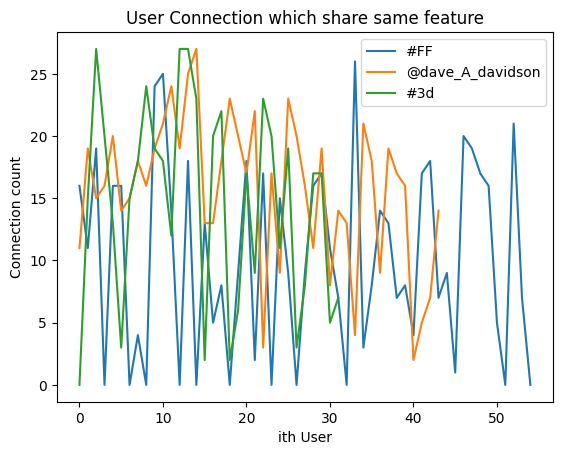

From the above graph we can see that there is many connection between the users who share the same feature. Here the top feature are hashtag "#FF","3d", and taggin of another user "@dave_A_davidson"  


In [6]:
# Get relationship of users sharing common feature, to check if having common feature results in connectivity
userConnection = {}
userConnectionFinal = {}
featAnalysisCount = 0    
for feat in highUserFeatureMap:
    userConnection = {}
    for node in feat_users_map[feat]:
        edges = list(G.out_edges(int(node)))
        userConCount = 0
        for edge in edges:
            if (str(edge[1]) in feat_users_map['#3d']):
                userConCount+=1
        userConnection[node] = userConCount
    userConnectionFinal[feat] = userConnection
    featAnalysisCount+=1
    if(featAnalysisCount == 3):
        break
        
for feats in userConnectionFinal:
    FeatConValues = userConnectionFinal[feats]
    FeatConCount = list(userConnectionFinal[feats].values())
    xaxisVal = []
    for count in range(len(FeatConValues)):
        xaxisVal.append(count)
    plt.plot(xaxisVal,FeatConCount,label=feats)
    
plt.xlabel("ith User")  
plt.ylabel("Connection count") 
plt.title("User Connection which share same feature") 
plt.legend()
plt.show()
print('From the above graph we can see that there is many connection between the users who share the same feature. Here the top feature are hashtag "#FF","3d", and taggin of another user "@dave_A_davidson"  ' )